### Saudi Aqar prediction


The saudi real estate market is a fast-growing industry <br>
This dataset is collected and scrapped from Aqar website. The chosen cities are Riyadh, Jeddah, Dammam, and Al-Khobar. This dataset focused on the rental houses. It contains information about 3000 properties from various districts



### Step 1: Importing Libraries

In [1]:
# ! conda install -c conda-forge plotnine
# ! conda install -c conda-forge missingno
# ! conda install -c conda-forge category_encoders
# ! conda install -c conda-forge feature_engine


In [1]:
# Helper packages
import pandas as pd   
import numpy as np    
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
import missingno as msno

# Modeling pre-processing with scikit-learn functionality
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Modeling pre-processing with non-scikit-learn packages
from category_encoders.ordinal import OrdinalEncoder
from feature_engine.encoding import RareLabelEncoder

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn import preprocessing
from sklearn import compose
from sklearn import cross_decomposition
from sklearn import decomposition
from sklearn import model_selection
from sklearn import linear_model
from sklearn import pipeline

### Step 2: Read Dataset


In [9]:
housing= pd.read_csv('housing.csv')

### Step 3: Exploration the Dataset charstaristics


In [10]:
housing

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,1921,الدمام,حي ضاحية الملك فهد,غرب,250,0,7,5,3,1,...,1,0,1,0,1,1,0,0,33000,دبلكس الاجار جديد ثلاثه ادوار الحي السابع كل ٦...
2970,709,الرياض,حي الملز,غرب,300,33,5,5,2,1,...,0,0,1,0,0,0,0,0,50000,فيلا دورين درج داخلي مجددة
2971,2487,الدمام,حي ضاحية الملك فهد,شمال,250,0,5,5,3,1,...,0,0,0,0,0,0,0,0,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...
2972,174,الرياض,حي طويق,جنوب غربي,320,3,6,5,2,1,...,0,0,0,0,1,1,0,0,35000,فيلا للإيجار على زاوية\nمطبخ راكب \n٤ غرف نوم ...


### Step 4: feature engineering 


In [11]:
housing.drop(columns= 'Unnamed: 0',inplace = True)

In [12]:
housing

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,جدة,حي بريمان,جنوب,350,0,7,5,2,1,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,الدمام,حي ضاحية الملك فهد,غرب,250,0,7,5,3,1,1,...,1,0,1,0,1,1,0,0,33000,دبلكس الاجار جديد ثلاثه ادوار الحي السابع كل ٦...
2970,الرياض,حي الملز,غرب,300,33,5,5,2,1,0,...,0,0,1,0,0,0,0,0,50000,فيلا دورين درج داخلي مجددة
2971,الدمام,حي ضاحية الملك فهد,شمال,250,0,5,5,3,1,0,...,0,0,0,0,0,0,0,0,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...
2972,الرياض,حي طويق,جنوب غربي,320,3,6,5,2,1,1,...,0,0,0,0,1,1,0,0,35000,فيلا للإيجار على زاوية\nمطبخ راكب \n٤ غرف نوم ...


In [17]:
# Encoding categorical data 
def encodingColumns(dataFr,column):
    ohe = OneHotEncoder()
    feature_array = ohe.fit_transform(dataFr[[column]]).toarray()
    feature_lable = ohe.categories_
    feature = pd.DataFrame(feature_array,columns=feature_lable)
    dataFr = pd.concat([dataFr,feature],axis=1)
    return dataFr

encoded_housing = encodingColumns(housing,"city")
encoded_housing = encodingColumns(encoded_housing,"Accommodation_types")


In [18]:
encoded_housing

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,duplex,stairs,elevator,fireplace,price,details,"( الخبر,)","( الدمام,)","( الرياض,)","( جدة,)"
0,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,1,...,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083,0.0,0.0,1.0,0.0
1,جدة,حي بريمان,جنوب,350,0,7,5,2,1,1,...,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,0.0,0.0,0.0,1.0
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,0.0,0.0,1.0,0.0
3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,0.0,1.0,0.0,0.0
4,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,1,...,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,الدمام,حي ضاحية الملك فهد,غرب,250,0,7,5,3,1,1,...,1,1,0,0,33000,دبلكس الاجار جديد ثلاثه ادوار الحي السابع كل ٦...,0.0,1.0,0.0,0.0
2970,الرياض,حي الملز,غرب,300,33,5,5,2,1,0,...,0,0,0,0,50000,فيلا دورين درج داخلي مجددة,0.0,0.0,1.0,0.0
2971,الدمام,حي ضاحية الملك فهد,شمال,250,0,5,5,3,1,0,...,0,0,0,0,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...,0.0,1.0,0.0,0.0
2972,الرياض,حي طويق,جنوب غربي,320,3,6,5,2,1,1,...,1,1,0,0,35000,فيلا للإيجار على زاوية\nمطبخ راكب \n٤ غرف نوم ...,0.0,0.0,1.0,0.0


In [19]:
encoded_housing.drop(columns= ['city','district','front','details',"Accommodation_types"],inplace = True)

In [ ]:
encoded_housing.columns

### Step 5 : Building Modals 

####  Simple linear regression

In [20]:
train, test = train_test_split(encoded_housing, train_size=0.8, random_state=123)
# separate features from labels and only use numeric features
# Create X_train,y_train
X_train = train.drop("price", axis=1)
y_train = train[["price"]]

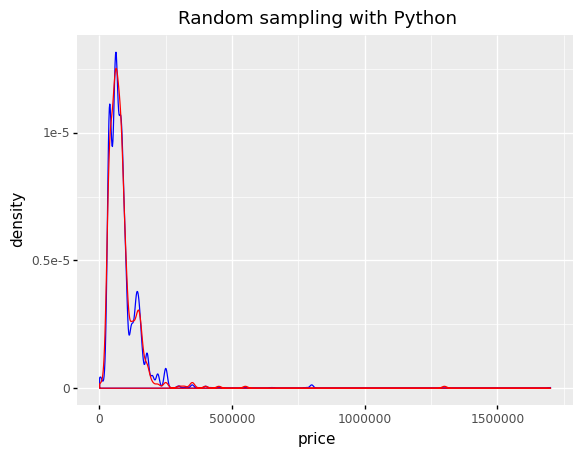

<ggplot: (8762516760314)>

In [21]:
#
(ggplot(train, aes('price'))
 + geom_density(color = "blue")
 + geom_density(data = test, color = "red")
 + ggtitle("Random sampling with Python"))

In [22]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only size feature
lm_fit = lm_mod.fit(X_train[["size"]], y_train)

Text(1500, 3000, 'y = 35141.65 + 142.90x')

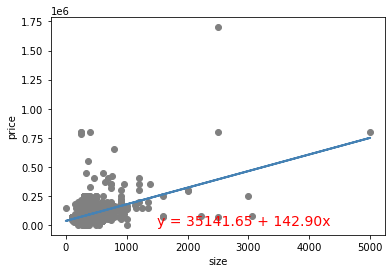

In [23]:
x_train = train["size"]
y_train = train["price"]

a, b = np.polyfit(x_train, y_train, 1)
plt.scatter(x_train, y_train, color='grey')

plt.plot(x_train, a*x_train+b, color='steelblue', linestyle='-', linewidth=2)
plt.xlabel('size')
plt.ylabel('price')

plt.text( 1500,3000,'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14, color = 'red')

In [24]:
print ('Coefficients: ', lm_fit.coef_)
print ('Intercept: ',lm_fit.intercept_)

Coefficients:  [[142.89655883]]
Intercept:  [35141.64911315]


#### all feature

In [25]:

# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with all features
lm_fit = lm_mod.fit(X_train.values, y_train)

In [26]:
print ('Coefficients: ', lm_fit.coef_)
print ('Intercept: ',lm_fit.intercept_)

Coefficients:  [ 1.23039341e+02 -1.99887083e+01 -1.85056060e+03 -2.74261827e+03
  6.01724305e+03  1.04182843e+04 -4.55663465e+03  1.18393643e+04
  1.94090759e+04  1.59192582e+04  1.60473583e+04 -8.03479716e+03
  2.68403436e+04  3.09537330e+03  3.78085318e+04  1.88405717e+03
  3.89948902e+03  3.72039824e+03 -3.45701837e+03 -1.27857914e+03
 -1.48838627e+04  8.09688495e+03  8.06555687e+03]
Intercept:  5059.019095824202


few features model

In [27]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only size feature
lm_fit = lm_mod.fit(X_train[["size",'ac','property_age','furnished','']], y_train)

In [28]:
print ('Coefficients: ', lm_fit.coef_)
print ('Intercept: ',lm_fit.intercept_)

Coefficients:  [  137.65191487 32807.46170042   366.52151774 14046.3654476 ]
Intercept:  14938.521362154643


In [30]:
# basic model object
knn = KNeighborsRegressor()

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = model_selection.KFold(n_splits=15, random_state=8451, shuffle=True)

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 25)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train.values, y_train)

# Best model's cross validated RMSE
abs(results.best_score_) 

53584.00331535678

In [31]:
results.best_estimator_.get_params().get('n_neighbors')

17

## Step6 - evaluating and selecting the model



#### Assessing model accuracy


In [32]:
# feature sets to compare across
feature_set1 = X_train[["size"]]
feature_set2 = X_train[["size", "ac","property_age",'furnished']]
feature_set3 = X_train
feature_sets = {'lm1': feature_set1, 'lm2': feature_set2, 'lm3': feature_set3}

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = model_selection.KFold(n_splits=15, random_state=8451, shuffle=True)

# object to store CV RMSE results
results = {}

for name, feat in feature_sets.items():
  # create LM model object
  lm_mod = linear_model.LinearRegression()

  # execute and score the cross validation procedure
  cv_results = model_selection.cross_val_score(
    estimator=lm_mod, 
    X=feat.values, 
    y=y_train, 
    cv=kfold, 
    scoring=loss
    )
  results[name] = np.absolute(cv_results.mean())

In [33]:
results 


{'lm1': 61974.000056376404, 'lm2': 59143.63555856034, 'lm3': 54993.58939662736}

In [35]:
pd.DataFrame.from_dict(
  results,
  orient='index',
  columns=['RMSE']
  ).rename_axis('n_components').reset_index()

,n_components,RMSE
0,1,54993.589397
1,2,54993.589397
2,3,54993.588025
3,4,54993.566196
4,5,54993.640375
5,6,54993.629936
6,7,54993.566743
7,8,54993.513054
8,9,54993.480102
9,10,54993.566970


In [36]:
test

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,...,basement,duplex,stairs,elevator,fireplace,price,"( الخبر,)","( الدمام,)","( الرياض,)","( جدة,)"
1732,375,9,5,5,2,1,0,1,1,0,...,0,0,1,0,0,100000,0.0,0.0,0.0,1.0
645,350,0,7,5,3,1,1,1,1,0,...,0,0,1,0,0,100000,0.0,1.0,0.0,0.0
511,330,0,6,4,2,1,0,0,0,0,...,0,1,0,0,1,37000,1.0,0.0,0.0,0.0
613,400,0,5,5,2,1,1,0,0,0,...,0,0,0,0,0,80000,0.0,0.0,1.0,0.0
906,375,4,4,4,2,1,1,1,1,1,...,0,0,1,0,0,110000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,437,0,7,5,2,0,1,0,1,0,...,0,1,1,0,1,60000,1.0,0.0,0.0,0.0
1144,200,0,7,5,2,1,1,0,1,1,...,0,1,1,0,0,60000,0.0,1.0,0.0,0.0
2761,437,0,7,5,2,1,1,0,1,0,...,0,1,1,0,1,60000,1.0,0.0,0.0,0.0
1224,260,5,5,5,2,1,1,0,0,0,...,0,1,1,0,0,110000,0.0,0.0,1.0,0.0


In [43]:
from sklearn.metrics import r2_score

# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with all features
lm_fit = lm_mod.fit(X_train.values, y_train)

X_test = test.drop("price", axis=1)
y_test = np.asanyarray(test[['price']])

y_predicted = lm_mod.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - y_predicted)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_predicted) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_predicted) )

Mean absolute error: 47524.33
Residual sum of squares (MSE): 6888164839.23
R2-score: 0.27


In [ ]:
# create k-fold cross validation object
kfold = model_selection.KFold(n_splits=15, random_state=8451, shuffle=True)

# define loss function
loss = 'neg_root_mean_squared_error'

# create our preprocessing steps
scaler = preprocessing.StandardScaler()
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")
num_feat_only = compose.make_column_selector(dtype_include="number")
cat_feat_only = compose.make_column_selector(dtype_include="object")

# create object to save results
results = {}

# iterate over over 2, 4, 6, ..., 26 components and train model
for n_comp in range(1, 19, 1):
  # create PCA object with n components
  pca = decomposition.PCA(n_components=n_comp)
  
# combine all steps into a pre-processing pipeline
  preprocessor = compose.ColumnTransformer(
    remainder="passthrough",
    transformers=[
    ("std_encode", scaler, num_feat_only),
    ("pca_encode", pca, num_feat_only),
    ("one-hot", encoder, cat_feat_only),
    ])

  # create linear model object
  lm_mod = linear_model.LinearRegression()

  # create a pipeline object that combines model with recipe
  model_pipeline = pipeline.Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lm", lm_mod),
  ])

  # train and fit our model
  cv_results = model_selection.cross_val_score(
    estimator=model_pipeline, 
    X=X_train, 
    y=y_train, 
    cv=kfold, 
    scoring=loss
    )

  # get results
  results[n_comp] = np.absolute(cv_results.mean())